<a href="https://colab.research.google.com/github/Liki19-HJ-dot/Spotify_Genre_Grouping.ipynb/blob/main/Spotify_Genre_Grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/spotify dataset.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#1. Data Preprocessing

In [ ]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

# Check for duplicates
duplicates = spotify_data.duplicated().sum()

missing_values, duplicates


(track_id                    0
 track_name                  5
 track_artist                5
 track_popularity            0
 track_album_id              0
 track_album_name            5
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 np.int64(0))

In [ ]:
# Drop rows with missing values in specific columns
spotify_data_cleaned = spotify_data.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verify that there are no more missing values in these columns
spotify_data_cleaned.isnull().sum()


,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


#2. Data Analysis and Visualizations


## a. Distribution of Playlist Genres

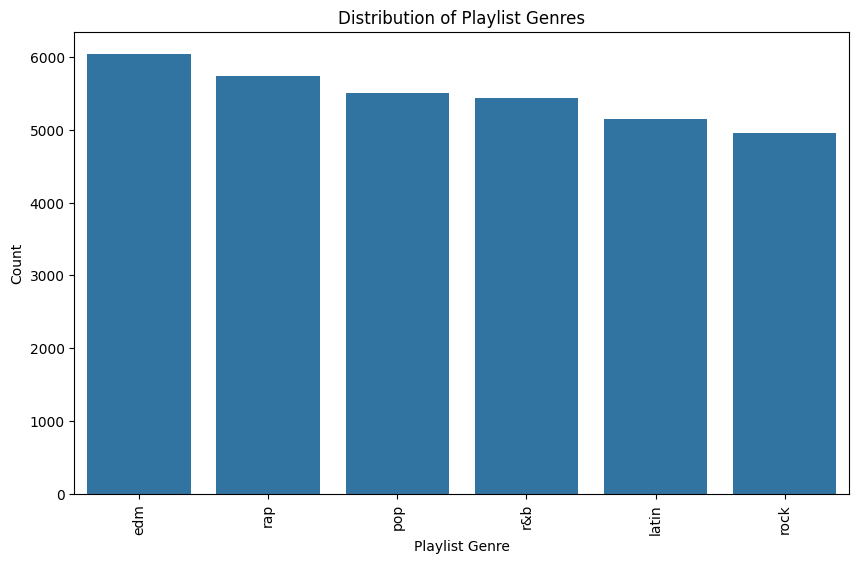

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of playlist genres
plt.figure(figsize=(10,6))
sns.countplot(data=spotify_data_cleaned, x='playlist_genre', order=spotify_data_cleaned['playlist_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.show()


## b. Popularity of Songs by Genre

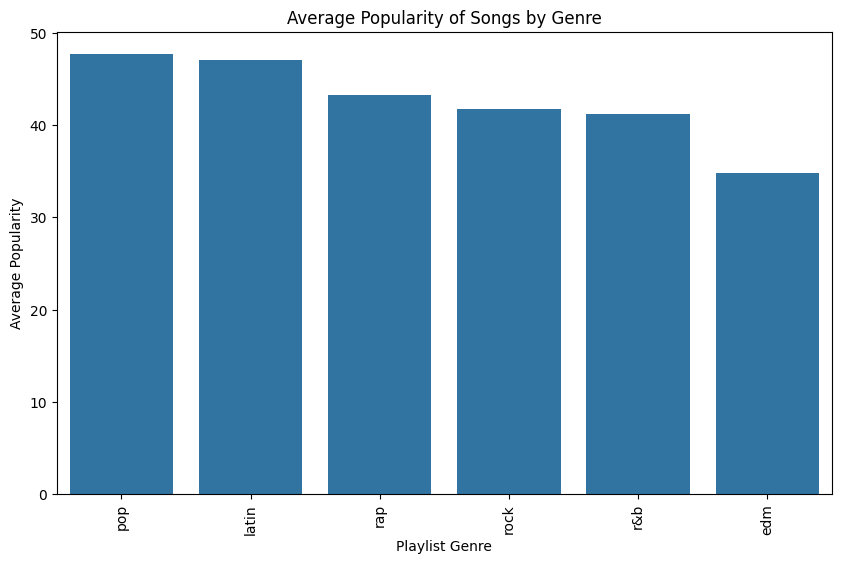

In [ ]:
# Plot the average popularity of songs by genre
plt.figure(figsize=(10,6))
genre_popularity = spotify_data_cleaned.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=90)
plt.title('Average Popularity of Songs by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Popularity')
plt.show()


## c. Correlation Matrix

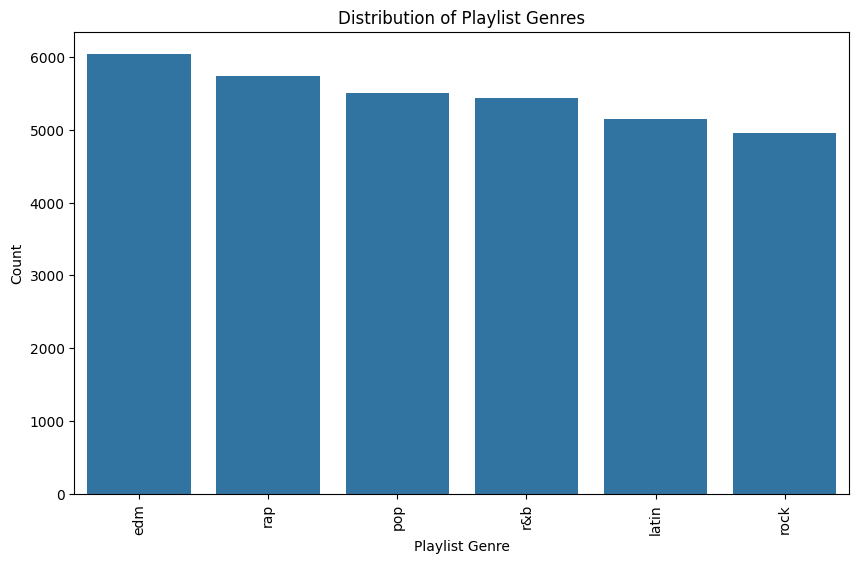

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of playlist genres
plt.figure(figsize=(10,6))
sns.countplot(data=spotify_data_cleaned, x='playlist_genre', order=spotify_data_cleaned['playlist_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.show()


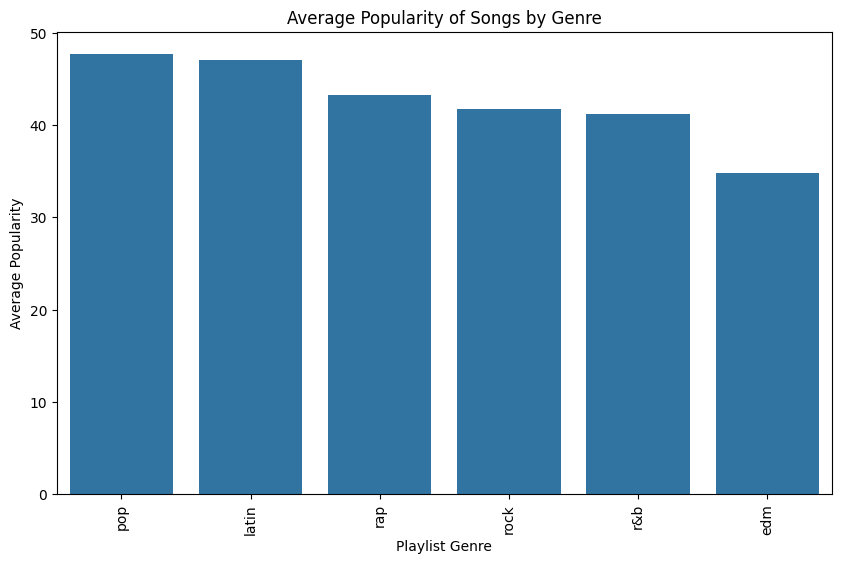

In [ ]:
# Plot the average popularity of songs by genre
plt.figure(figsize=(10,6))
genre_popularity = spotify_data_cleaned.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=90)
plt.title('Average Popularity of Songs by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Popularity')
plt.show()


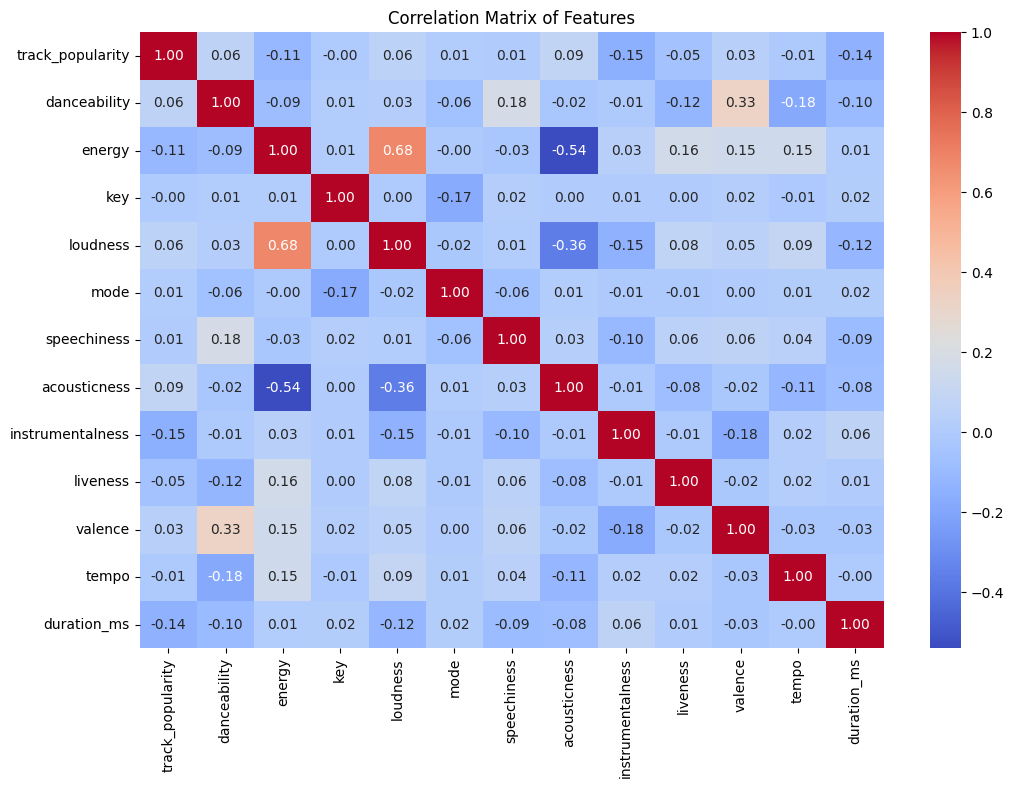

In [ ]:
# Compute the correlation matrix, excluding non-numerical columns
correlation_matrix = spotify_data_cleaned.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Clustering Analysis
Next, let's identify and plot different clusters according to parameters like playlist genres and playlist names.

We'll use K-means clustering to group similar songs. To do this, we'll first need to select relevant features for clustering, such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

a. Standardize the features
We'll standardize the features before applying K-means clustering.

b. Apply K-means clustering
We'll use the elbow method to determine the optimal number of clusters.

c. Plot the clusters
Let's start with these steps:

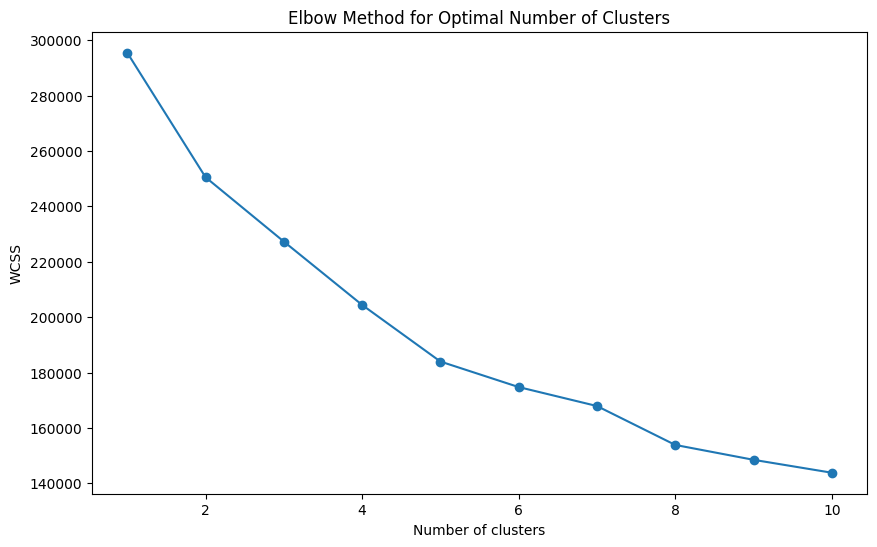

<ipython-input-32-5625a413cb5a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.fit_predict(X_scaled)
<ipython-input-32-5625a413cb5a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['pca1'] = X_pca[:, 0]
<ipython-input-32-5625a413cb5a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

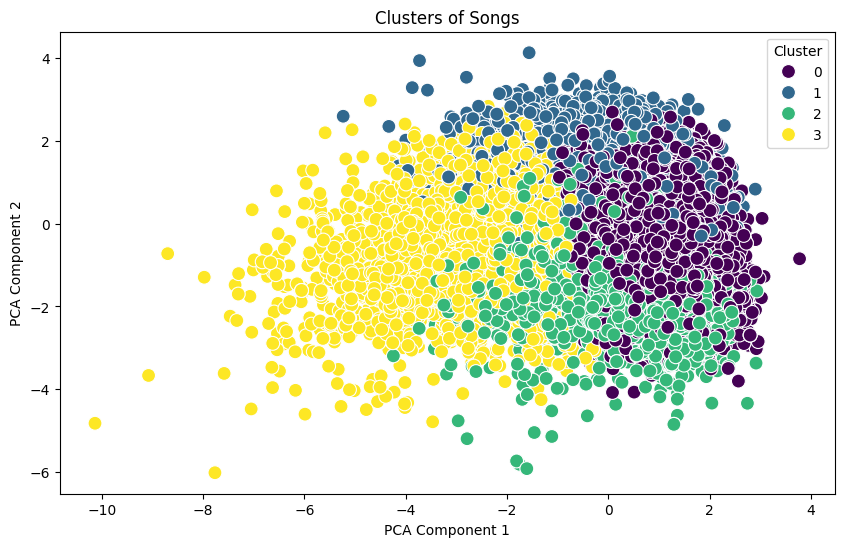

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 4  # Assuming the elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
spotify_data_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
spotify_data_cleaned['pca1'] = X_pca[:, 0]
spotify_data_cleaned['pca2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data_cleaned, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


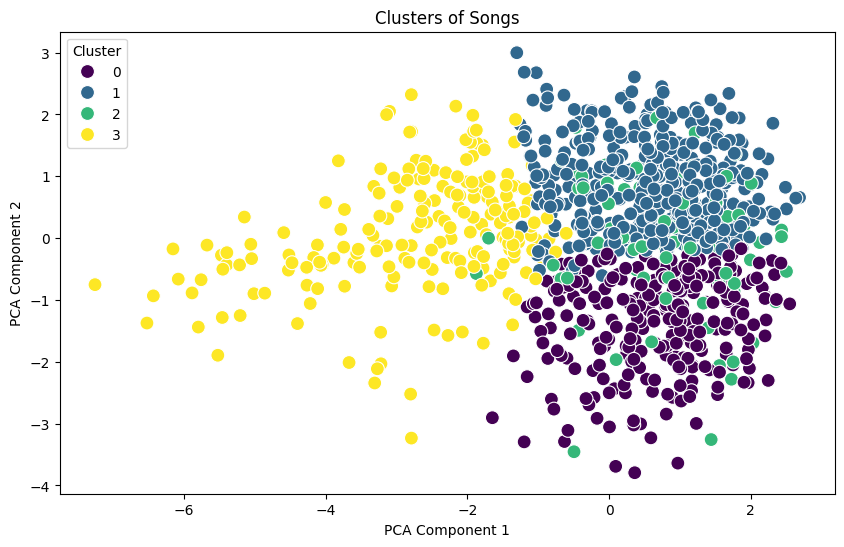

In [ ]:
# Reduce the dataset size for quicker computation
spotify_sampled = spotify_data_cleaned.sample(n=1000, random_state=42)

# Select features for clustering
X_sampled = spotify_sampled[features]

# Standardize the features
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Reduce dimensions for visualization using PCA
X_pca_sampled = pca.fit_transform(X_scaled_sampled)
spotify_sampled['pca1'] = X_pca_sampled[:, 0]
spotify_sampled['pca2'] = X_pca_sampled[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_sampled, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Verify the clustering results
spotify_sampled[['track_name', 'cluster']].head()


,track_name,cluster
113186,No Other Name,0
42819,Failed Organum,0
59311,"Save the Trees, Pt. 1",3
90417,It's Only Make Believe,3
61000,月の大きさ,1


In [ ]:
# Check data types
print(spotify_sampled.dtypes)

# Verify input data for clustering
print(X_sampled.head())

# Error handling for K-means clustering
try:
    # Standardize the features
    scaler = StandardScaler()
    X_scaled_sampled = scaler.fit_transform(X_sampled)

    # Apply K-means clustering with a fixed number of clusters (e.g., 4)
    kmeans_sampled = KMeans(n_clusters=4, random_state=42)
    spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

    # Verify the clustering results
    print(spotify_sampled[['track_name', 'playlist_genre', 'cluster']].head())
except Exception as e:
    print(f"Error: {e}")


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
cluster               int32
pca1                float64
pca2                float64
dtype: object
        danceability  energy  loudness  speechiness  acousticness  \
113186         0.369   0.598    -6.984       0.0304       0.00511   
42819          0.171   0.997    -3.586       0.1180       0.00521   
59311          0.173   0.803   -10.071       0.1440       0.61300   
90417          0.419   0.382   -13.438

## Step-by-Step Debugging
1.Check for any non-numeric values in the feature set.

2.Validate the scaling operation.

3.Apply clustering to a very small subset of the data to isolate any issues.

In [ ]:
# Ensure there are no non-numeric values in the features
import numpy as np
print(X_sampled.applymap(np.isreal).all())

# Validate the scaling operation
try:
    X_scaled_sampled = scaler.fit_transform(X_sampled)
    print("Scaling successful")
except Exception as e:
    print(f"Scaling error: {e}")

# Apply clustering to a very small subset of the data (e.g., 100 rows)
try:
    kmeans_sampled = KMeans(n_clusters=4, random_state=42)
    small_subset = X_scaled_sampled[:100]
    clusters = kmeans_sampled.fit_predict(small_subset)
    print("Clustering successful for small subset")
    print(clusters)
except Exception as e:
    print(f"Clustering error: {e}")


danceability        True
energy              True
loudness            True
speechiness         True
acousticness        True
instrumentalness    True
liveness            True
valence             True
tempo               True
dtype: bool
Scaling successful
Clustering successful for small subset
[3 3 1 1 0 0 2 3 0 3 1 0 1 0 1 1 0 3 3 0 3 0 3 3 0 0 0 0 1 3 1 3 0 1 0 0 3
 0 0 1 1 3 0 1 0 0 0 3 3 0 3 0 0 3 3 3 3 0 3 0 1 1 0 1 1 3 0 0 3 1 0 1 3 3
 3 1 3 0 3 1 0 0 0 0 2 0 0 1 3 0 0 3 3 0 0 1 0 0 0 3]


<ipython-input-37-83c0cb09167a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_sampled.applymap(np.isreal).all())


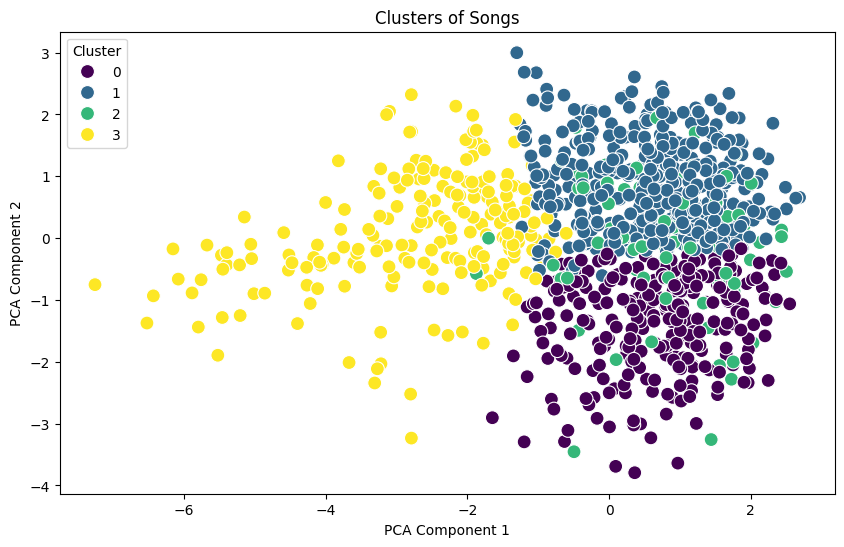

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca_sampled = pca.fit_transform(X_scaled_sampled)
spotify_sampled['pca1'] = X_pca_sampled[:, 0]
spotify_sampled['pca2'] = X_pca_sampled[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_sampled, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# 4. Building the Recommendation Model
To build a recommendation system, we can use a clustering-based approach or a collaborative filtering method. For simplicity, we'll use the clustering approach, where we recommend songs from the same cluster.

In [ ]:
def recommend_songs(track_id, n_recommendations=5):
    if track_id not in spotify_sampled['track_id'].values:
        print(f"No track found with ID: {track_id}")
        return None

    # Find the cluster of the input song
    track_cluster = spotify_sampled[spotify_sampled['track_id'] == track_id]['cluster'].values[0]

    # Find other songs in the same cluster
    similar_songs = spotify_sampled[spotify_sampled['cluster'] == track_cluster]

    # Exclude the input song from the recommendations
    recommendations = similar_songs[similar_songs['track_id'] != track_id]

    # Select the top N recommendations based on popularity
    top_recommendations = recommendations.sort_values(by='track_id', ascending=False).head(n_recommendations)

    return top_recommendations[['track_name', 'album_name', 'track_id']]

# List some available track IDs for testing
print("Available track IDs for testing:")
available_ids = spotify_sampled['track_id'].sample(10).values
print(available_ids)

# Example usage with a valid track ID from the above list
example_track_id = available_ids[0]
recommendations = recommend_songs(example_track_id)
print(recommendations)


Available track IDs for testing:
['2pXg8l1JGZ3hCyFqxirV13' '5i7s3sB1LzxeVz8CWVEpAO'
 '0PbAyLrJRDxckQBLQ2Addc' '2B5a8L30R9vk3F9clonX5g'
 '34XYMzu7cmqQjItV8mJ77m' '0GoyU0X4nwqUigVwBPSDen'
 '3unQNaBrMFjhEmhlwaf0Pg' '6GolUC84z0Sb6YQ6iAmi4S'
 '33IPzl4qNKrI4UsLVemh5U' '1Qd5izEmKI7jIhoNDYwcAF']
               track_name                       album_name  \
64117  Frosty The Snowman  All I Want For Christmas Is You   
27595             Azimuth           The Start of No Regret   
88678   Llego el bailador                   Tropical Vibes   
70924                 季節雨                               夢田   
651      Careless Whisper                 Careless Whisper   

                     track_id  
64117  7zrxUrilLtTk4XnT5G7zF8  
27595  7z60LyZVJJXrE6YPJ39ioD  
88678  7ytbVby5rfR6JtS6LX9UDo  
70924  7x2It3MYN1QdytzgoLYGr5  
651    7wiULYwv85WeChygucbpTF  
